In [52]:
import numpy as np
import pandas as pd
import pickle
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import multivariate_normal
from PIL import Image

## 4.3.1

In [53]:
personInfo = pickle.load(open("SMAI-Dataset-problem-4.3/colors.pkl", "rb"))
print (personInfo.shape)
mean = np.mean(personInfo, axis=0)
std = np.std(personInfo, axis=0)
# Perform normalization
normalized_data = np.array((personInfo - mean) / std)
data = np.array(normalized_data)


(100, 2)


In [84]:
#GMM for clustering
gmm = GaussianMixture(n_components = 7, init_params='k-means++',max_iter=1000)
gmm.fit(data)
means = gmm.means_
covariances = gmm.covariances_

In [85]:
means

array([[-0.08222079, -1.31589989],
       [-0.08360616,  1.68239822],
       [-0.08111316,  0.17409466],
       [ 1.24160796,  0.18295224],
       [-1.39433273,  0.17796916],
       [ 1.23812717, -1.3173598 ],
       [-1.39259812,  1.67847251]])

In [100]:
rgb_centroids = [colors.hsv_to_rgb([hsv[0], hsv[1], 1]) for hsv in means]
# t = tuple(rgb_centroids[0])
# t[0]
# t_n = np.array(rgb_centroids)
integer_matrix = [[int(50*abs(x)) for x in row] for row in rgb_centroids]
tup_rgb = tuple(integer_matrix)
# integer_matrix
print(rgb_centroids)
tup_rgb

[array([1.        , 2.96506587, 2.31589989]), array([ 1.        , -1.52635133, -0.68239822]), array([1.        , 0.74117713, 0.82590534]), array([ 0.82590534, -0.48667894,  0.82590534]), array([0.81704776, 0.44964775, 0.82590534]), array([ 0.82203084, -0.36599636,  0.82590534]), array([2.3173598 , 0.42876303, 0.82590534])]


([50, 148, 115],
 [50, 76, 34],
 [50, 37, 41],
 [41, 24, 41],
 [40, 22, 41],
 [41, 18, 41],
 [115, 21, 41])

From the centroid data we can say that it contain 7 different colour

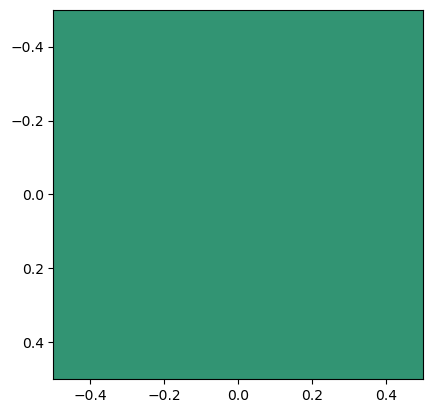

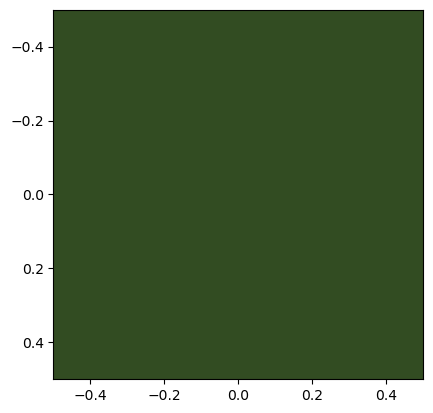

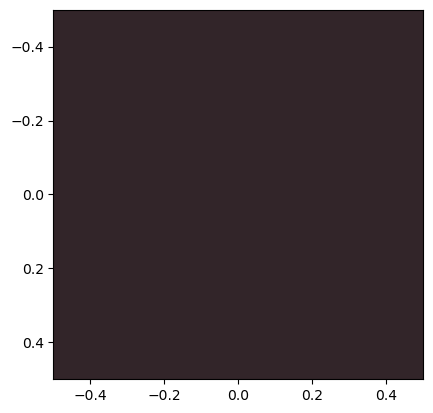

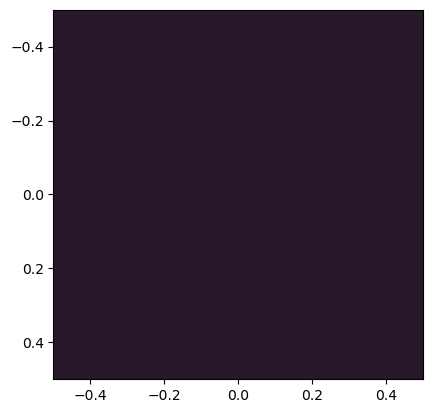

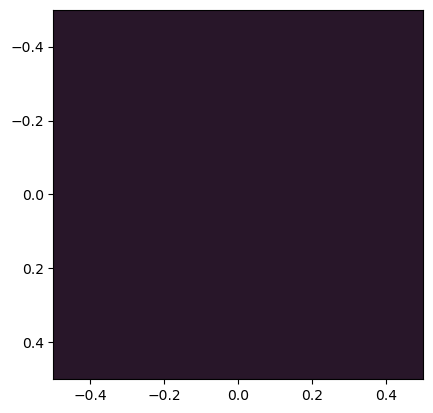

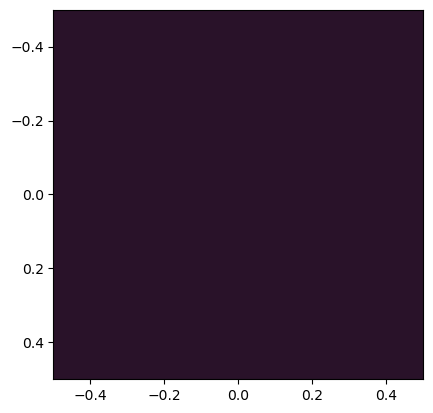

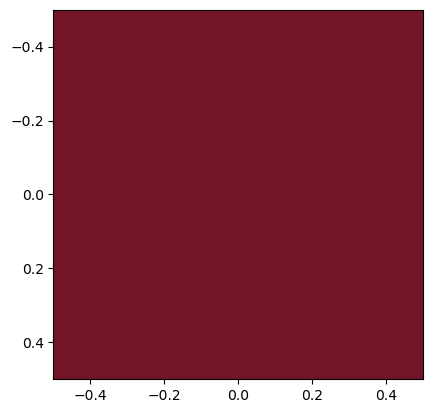

In [101]:
# from webcolors import rgb_to_name
for t in tup_rgb:
    img = Image.new('RGB', (1, 1), tuple(t))
# img.show()
    plt.imshow(img)
    plt.show()

In [90]:
#HSV to RGB conversion
con_col = np.array([[0.1] for i in range(100)])   # add V column in HS data to make it HSV
data_m = np.append(personInfo, con_col, axis=1)
data_rgb = colors.hsv_to_rgb(data_m) 
#min max to convert sample in [0,1] range
s = MinMaxScaler()                              
normalized_data = s.fit_transform(data_rgb)

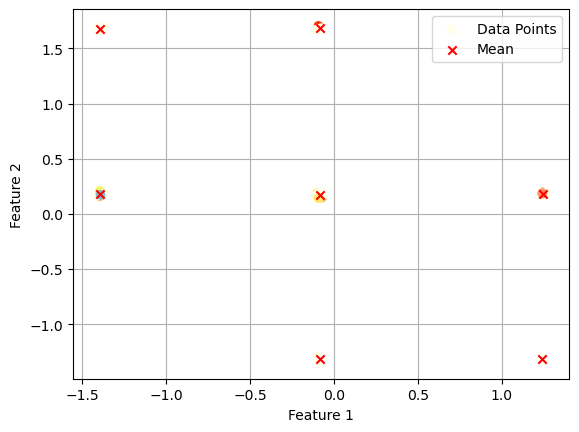

In [91]:
#plot the centroids of data and data samples
plt.scatter(data[:, 0], data[:, 1], label='Data Points',c=normalized_data)
plt.scatter(means[:,0], means[:,1], color='red', marker='x', label='Mean')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Obsevation:  
Above scatter plot that the data is distributed in seven clusters. which exactly pointed at the centroid of the clusters.
which shows that given data is the composition of seven colours.

## 4.3.2 Sample generator 

In [157]:
#function of sample generator to get datasample for given disributions
def multivariate_normal_sample_generator(n_components,means, covariances, n_samples = 100):
    samples = []
    x =0
    for i in range(n_components):
        for _ in range(int(n_samples/n_components)):
            sample = np.random.multivariate_normal(means[i], covariances[i])
            samples.append(sample)

    if n_samples%n_components !=0:
        x = n_samples%n_components
        for r in range(x):
            sample = np.multivariate_normal(means[r], covariances[r])
            samples.append(sample)
    samples = np.array(samples)
    np.random.shuffle(samples)
    return samples

Generation of the sample dataset using the distribution of given dataset

In [158]:
gen_samples =multivariate_normal_sample_generator(2,means,covariances,100)

In [160]:
con_col = np.array([[0.1] for i in range(100)])
data_m = np.append(gen_samples, con_col, axis=1)
data_rgb = colors.hsv_to_rgb(data_m) 

s = MinMaxScaler()
normalized_data = s.fit_transform(data_rgb)

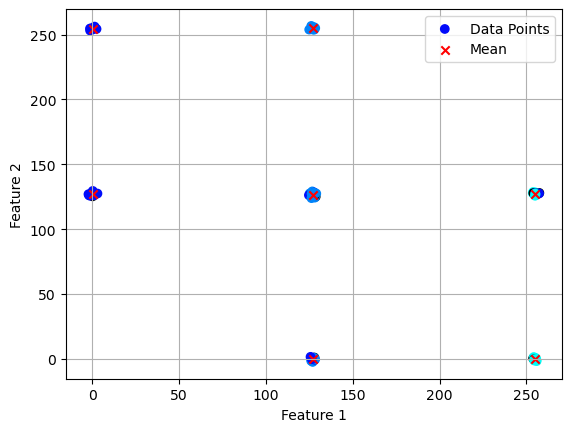

In [161]:
#plot of the generated data samples and cetroid of given dataset
plt.scatter(data[:, 0], data[:, 1], label='Data Points',c=normalized_data)
plt.scatter(means[:,0], means[:,1], color='red', marker='x', label='Mean')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Observations:  
In above plot the data sample of the generated dataset are exctly concentrated at the centroid of the given 'colors.pkl' dataset. Which shows that both are belongs to same distribution.